# Objetivo del Notebook

El principal objetivo a llevar a cabo en este Jupyter Notebook, no es otro que llevar a cabo el procesamiento de datos, a fin de dejar el conjunto de datos
preparado para el desarrollo de nuestro modelo.

El preprocesamiento de datos incluye acciones como el escalado de variables, la normalizacion de los valores registrados, codificacion OneHot de variables categoricas normales, ...

# Importar las librerias a utilizar

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Instancio un objeto DataFrame con el conjunto de datos
dataset_route = '../data/raw/cardio_train.csv'
cardio_df = pd.read_csv(dataset_route, sep = ';', index_col = 'id')

# Muestro los primeros 10 ejemplos del conjunto de datos
cardio_df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


## Ingenieria de caracteristicas

In [3]:
# Cambio el formato registrado para los valores de la variable 'age'

cardio_df['age'] = round(cardio_df['age'] / 365, 1)   # Redondeo a un decimal el resultado de la conversion

# Muestro los primeros 10 ejemplos del conjunto de datos
cardio_df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0
8,60.0,1,151,67.0,120,80,2,2,0,0,0,0
9,60.6,1,157,93.0,130,80,3,1,0,0,1,0
12,61.9,2,178,95.0,130,90,3,3,0,0,1,1
13,48.4,1,158,71.0,110,70,1,1,0,0,1,0


In [4]:
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339486,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759534,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.600000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


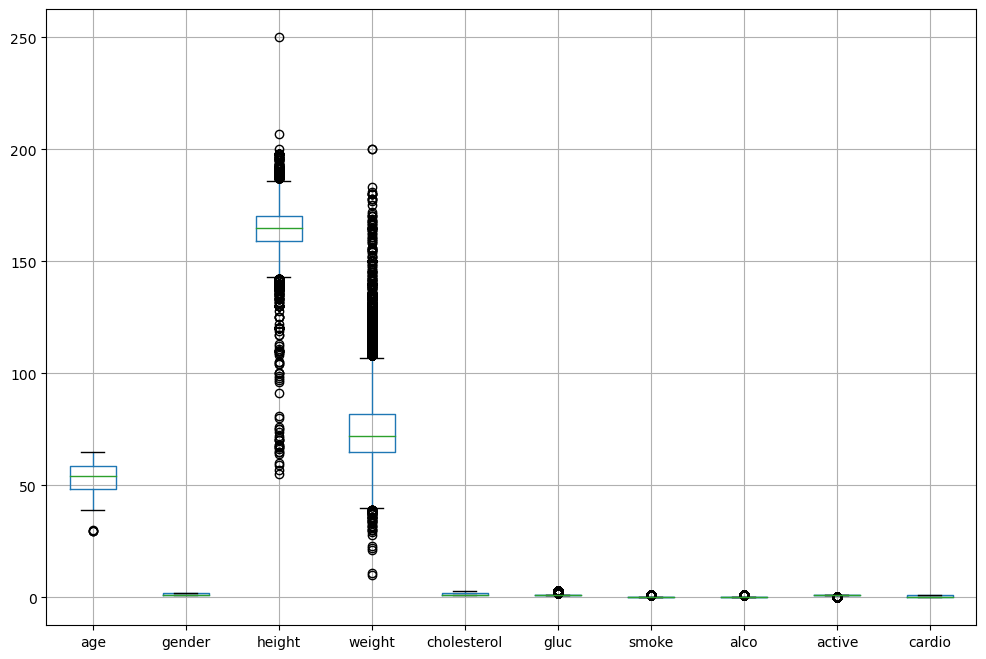

In [5]:
# Voy a generar un grafico BotPlot que excluya las variables 'ap_hi' y 'ap_lo'
plt.figure(figsize = (12, 8))
cardio_df.drop(columns=['ap_hi', 'ap_lo']).boxplot()

plt.show()

Ahora que el BoxPlot representa valores mas normalizados para las variables, puedo ver de una manera mas grafica la distribucion de los diferentes datos.

En este caso, existen demasiados outliers para las variables 'height' y 'weight', y tratar de eliminarlos todos puede reducir significativamente el numero de ejemplos del dataset.

Voy a tratar de operar las columnas una por una, y tratabajar procesando los outliers de cada una de manera especifica.

In [6]:
## Columna Age

# Muestro los primeros 20 registros del dataframe, ordenados de manera ascendente por el valor de la columna 'age'
cardio_df.sort_values(by = 'age', ascending = True)[:20]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
31922,29.6,2,175,92.0,100,60,1,1,0,0,1,0
8850,29.8,1,175,59.0,120,80,1,1,0,0,1,0
43842,29.8,1,159,59.0,120,80,1,1,0,0,1,0
79749,30.0,1,160,59.0,110,70,1,1,0,0,1,0
33868,39.1,2,168,109.0,150,100,1,2,0,1,1,1
76761,39.1,2,165,85.0,140,80,1,1,0,0,1,1
45362,39.1,1,164,105.0,150,110,3,3,0,0,1,1
65262,39.1,1,156,70.0,100,80,3,3,0,0,0,0
55110,39.1,1,156,45.0,110,80,2,1,0,0,0,0


In [7]:
# A partir de los 4 primeros registros, la edad de los pacientes se incrementa en torno a un 30%, por lo que puedo afirmar que estos 4 registros forman parte del grupo 
# outliers para esta caracteristica.

# Elimino estos 4 primeros ejemplos de mi dataset
cardio_df = cardio_df[(cardio_df['age'] > 31.0)]

In [8]:
cardio_df   # Verifico que se hayan eliminado estos 4 ejemplos.

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,47.9,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0
99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1
99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1


In [9]:
# Columna 'gender'

# La columna 'gender' contiene 2 posibles clases, 1 (Hombre) y 2 (Mujer)
# Voy a aplicar codificacion One Hot a esta columna, restando 1 a cada valor registrado. Asi, la columna contendra:
#  0 si el paciente es hombre
#  1 si el paciente es mujer

cardio_df['gender'] = cardio_df['gender'] - 1

In [10]:
## Columna Height

# Defino algunas variables estadisticas que me ayuden a interpretar los limites de cada uno de los percentiles.
first_cuartil = cardio_df['height'].quantile(0.25)
thirth_cuartil = cardio_df['height'].quantile(0.75)

print('Valor maximo registrado dentro del primer cuartil:', first_cuartil)
print('Valor maximo registrado dentro del tercer cuartil:', thirth_cuartil)

Valor maximo registrado dentro del primer cuartil: 159.0
Valor maximo registrado dentro del tercer cuartil: 170.0


In [11]:
height_mean = round(cardio_df['height'].mean(), 1)
height_mean   # Aplicare como valor para 'height' la media de los valores registrados, para todos aquellos registros cuyo valor para dicha columna se situe fuera de
              # la distribucion media de los valores mostrados en el grafico BoxPlot.

164.4

In [12]:
# Defino todos los valores a float
cardio_df['height'] = cardio_df['height'].astype(float)

# Aplico los cambios en la columna en funcion de los valores registrados
# Defino un filtro para buscar los ejemplos coincidentes
filtro = (cardio_df['height'] < first_cuartil) | (cardio_df['height'] > 190.0)

# Asigno el valor medio (height_mean) a los valores que cumplen el filtro en la columna 'height'
cardio_df.loc[filtro, 'height'] = height_mean

In [13]:
## Columna weight (Aplico la misma logica que con la columna 'height')


# Defino algunas variables estadisticas que me ayuden a interpretar los limites de cada uno de los percentiles.
first_cuartil = cardio_df['weight'].quantile(0.25)
thirth_cuartil = cardio_df['weight'].quantile(0.75)

print('Valor maximo registrado dentro del primer cuartil:', first_cuartil)
print('Valor maximo registrado dentro del tercer cuartil:', thirth_cuartil)

Valor maximo registrado dentro del primer cuartil: 65.0
Valor maximo registrado dentro del tercer cuartil: 82.0


In [14]:
# En este caso, los valoes de que marcan los limites de los cuartiles son demasiado normales, y si tengo en defino ambos valores como limite, puedo estar
# perdiendo informacion importante en mi modelo final
# Voy a definir manualmente unos limites superior e inferior

superior_limit = 120.0
inferior_limit = 48.0

# Calculo la media de los valores regitrados para esta columna
weight_mean = round(cardio_df['weight'].mean(), 1)

In [15]:
# Aplico los cambios en la columna en funcion de los valores registrados
# Defino un filtro para buscar los ejemplos coincidentes
filtro = (cardio_df['weight'] < inferior_limit) | (cardio_df['weight'] > superior_limit)

# Asigno el valor medio (height_mean) a los valores que cumplen el filtro en la columna 'height'
cardio_df.loc[filtro, 'weight'] = weight_mean

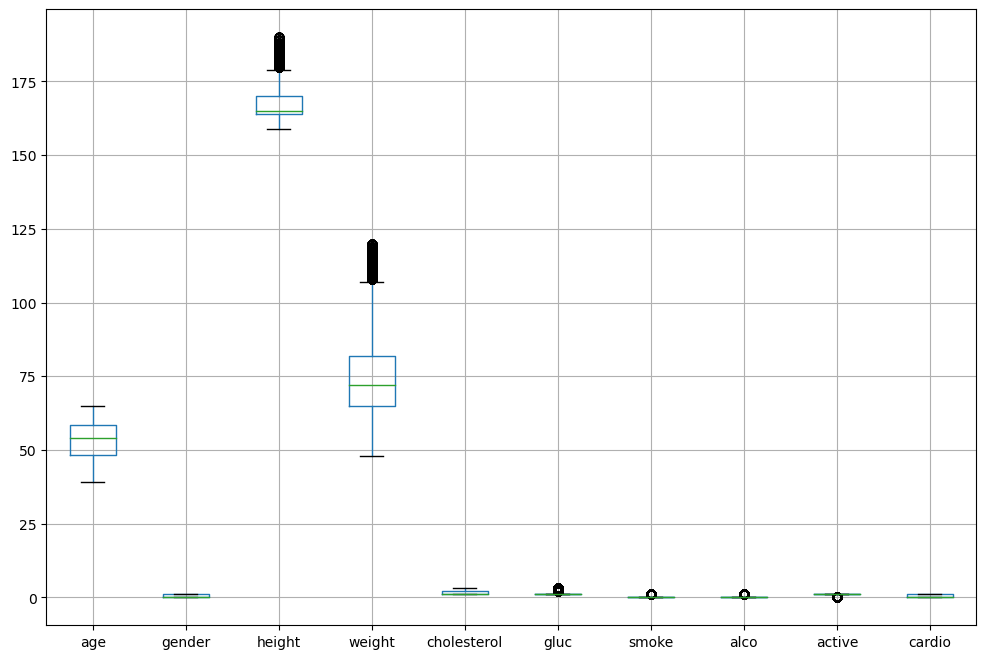

In [16]:
# Represento de nuevo un grafico BoxPlot, que excluya a las variables 'ap_hi' y 'ap_lo'
plt.figure(figsize = (12, 8))
cardio_df.drop(columns=['ap_hi', 'ap_lo']).boxplot()

plt.show()

In [17]:
## Nueva columna overweight

# Representara el BMI de un paciente, en valor binario. De esta forma, la columna contenga 1 si el paciente tiene un BMI >= 25, y 0 en caso contrario
bmi_values = cardio_df['weight'] / (cardio_df['height'] / 100)**2
cardio_df['overweight'] = bmi_values.apply(lambda x: 0 if x < 25 else 1)

# Elimino las columnas originales
cardio_df.drop(columns = ['weight', 'height'], inplace = True)

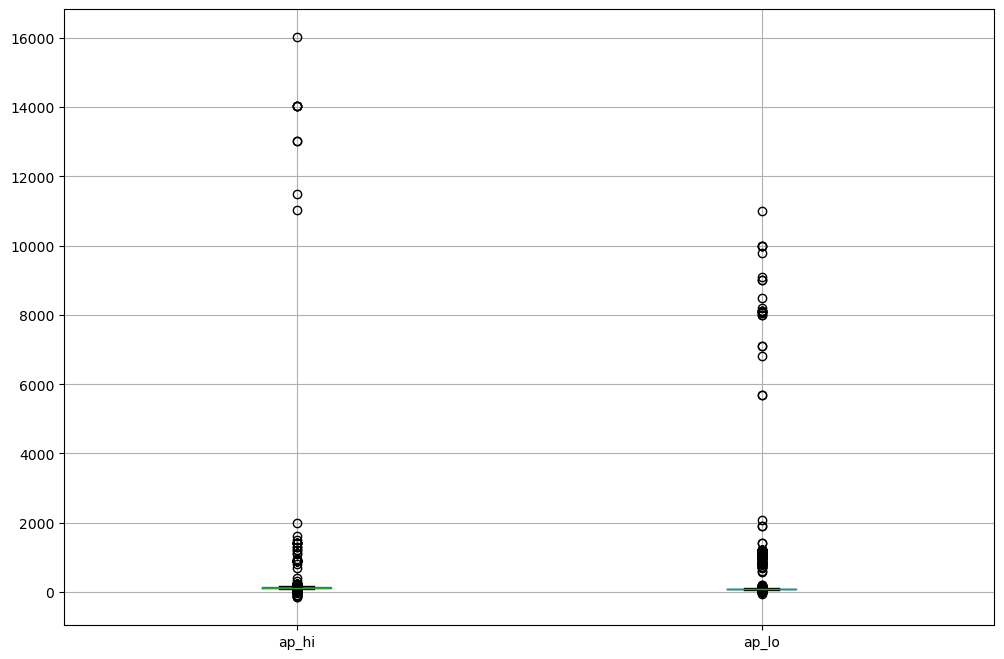

In [18]:
## Columnas 'ap_hi' y 'ap_lo'

# Genero un grafico BoxPlot que represente la distribucion de valores solamente para estas dos caracteristicas

plt.figure(figsize = (12, 8))
cardio_df[['ap_hi', 'ap_lo']].boxplot()

plt.show()

In [19]:
# El BotPlot actual no me permite ver la distribucion de los valores.

# Voy a truncar todos los valores registrados para ambas columnas que tengan un valor superior a 500
filtro = (cardio_df['ap_hi'] >= 500) | (cardio_df['ap_lo'] >= 500)
cardio_df = cardio_df[~filtro]

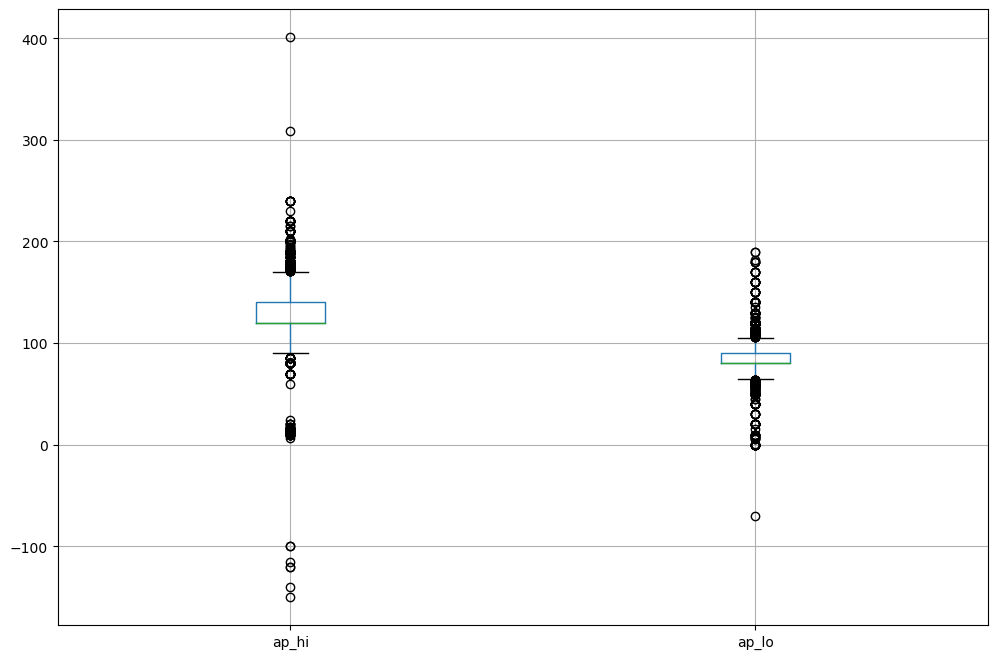

In [20]:
plt.figure(figsize = (12, 8))
cardio_df[['ap_hi', 'ap_lo']].boxplot()

plt.show()

In [21]:
# Defino algunas variables estadisticas que me ayuden a interpretar los limites de cada uno de los percentiles.

## Columna 'ap_hi'

first_cuartil__aphi = cardio_df['ap_hi'].quantile(0.25)
thirth_cuartil__aphi = cardio_df['ap_hi'].quantile(0.75)

In [22]:
thirth_cuartil__aphi

140.0

In [23]:
first_cuartil__aphi

120.0

In [24]:
# Viendo que existen bastantes ejemplos con un valor mayor de 140.0 para esta columna, voy aplicar un filtro que admita un limite superior algo mas elevado (percentil 99%)
superior_limit__aphi = 180.0

In [25]:
## Columna 'ap_lo'

first_cuartil__aplo = cardio_df['ap_lo'].quantile(0.25)
thirth_cuartil__aplo = cardio_df['ap_lo'].quantile(0.75)

In [26]:
thirth_cuartil__aplo

90.0

In [27]:
first_cuartil__aplo

80.0

In [28]:
# Defino como limite inferior el valor limite del percentil 5%
lower_limit__aplo = 70.0

# Defino como limite superior el valor limite del percentil 99%
superior_limit__aplo = 110.0

In [29]:
# Media para la columna 'ap_hi'
ap_hi__mean = round(cardio_df['ap_hi'].mean(), 1)


# Media para la columna 'ap_lo'
ap_lo__mean = round(cardio_df['ap_lo'].mean(), 1)


print('Valor medio de los registros de "ap_hi":', ap_hi__mean)
print('Valor medio de los registros de "ap_lo":', ap_lo__mean)

Valor medio de los registros de "ap_hi": 126.3
Valor medio de los registros de "ap_lo": 81.3


In [30]:
# Aplico los cambios en la columna en funcion de los valores registrados

## Columna 'ap_hi'

# Defino un filtro para buscar los ejemplos coincidentes
filtro = (cardio_df['ap_hi'] < first_cuartil__aphi) | (cardio_df['ap_hi'] > superior_limit__aphi)

# Asigno el valor medio (height_mean) a los valores que cumplen el filtro en la columna 'ap_hi'
cardio_df.loc[filtro, 'ap_hi'] = ap_hi__mean



## Columna 'ap_lo'

# Defino un filtro para buscar los ejemplos coincidentes
filtro = (cardio_df['ap_lo'] < lower_limit__aplo) | (cardio_df['ap_lo'] > superior_limit__aplo)

# Asigno el valor medio (height_mean) a los valores que cumplen el filtro en la columna 'ap_lo'
cardio_df.loc[filtro, 'ap_lo'] = ap_lo__mean

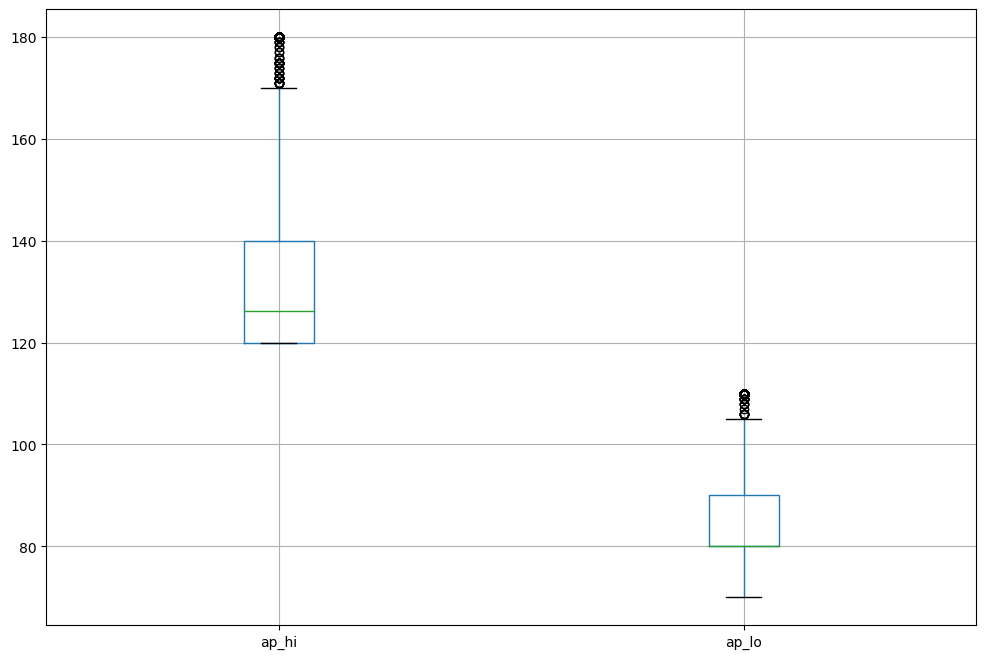

In [31]:
# Represento un BoxPlot con los valores para las columnas 'ap_hi' y 'ap_lo' ya estandarizados

plt.figure(figsize = (12, 8))
cardio_df[['ap_hi', 'ap_lo']].boxplot()

plt.show()

He ampliado algo el margen superior para los valores de cada una de las columnas, admitiendo valores incluidos en hasta el percentil 99% de los registros originales.

In [32]:
# Muestro un resumen del dataset ya procesado

cardio_df.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000,69005.000000
mean,53.326985,0.348728,130.062782,82.112721,1.364379,1.225868,0.087863,0.053590,0.803275,0.494906,0.575871
std,6.760505,0.476571,12.648567,7.876408,0.678684,0.571830,0.283098,0.225209,0.397525,0.499978,0.494214
min,39.100000,0.000000,120.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.400000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,54.000000,0.000000,126.300000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,58.400000,1.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,180.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69005 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69005 non-null  float64
 1   gender       69005 non-null  int64  
 2   ap_hi        69005 non-null  float64
 3   ap_lo        69005 non-null  float64
 4   cholesterol  69005 non-null  int64  
 5   gluc         69005 non-null  int64  
 6   smoke        69005 non-null  int64  
 7   alco         69005 non-null  int64  
 8   active       69005 non-null  int64  
 9   cardio       69005 non-null  int64  
 10  overweight   69005 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 6.3 MB


In [34]:
# Convierto todas las columnas en valores flotantes
cardio_df = cardio_df.astype(float)

In [35]:
cardio_df.head(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,
0,50.4,1.0,126.3,80.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,55.4,0.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0
2,51.7,0.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0
3,48.3,1.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,47.9,0.0,126.3,81.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,60.0,0.0,120.0,80.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
9,60.6,0.0,130.0,80.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0
12,61.9,1.0,130.0,90.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0
13,48.4,0.0,126.3,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [36]:
## Columna 'cholesterol'

cardio_df['cholesterol'] = cardio_df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)

In [37]:
## Columna 'gluc'

cardio_df['gluc'] = cardio_df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [38]:
cardio_df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,
0,50.4,1.0,126.3,80.0,0,0,0.0,0.0,1.0,0.0,0.0
1,55.4,0.0,140.0,90.0,1,0,0.0,0.0,1.0,1.0,1.0
2,51.7,0.0,130.0,70.0,1,0,0.0,0.0,0.0,1.0,0.0
3,48.3,1.0,150.0,100.0,0,0,0.0,0.0,1.0,1.0,1.0
4,47.9,0.0,126.3,81.3,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99993,52.7,1.0,120.0,80.0,0,0,1.0,0.0,1.0,0.0,1.0
99995,61.9,0.0,140.0,90.0,1,1,0.0,0.0,1.0,1.0,1.0
99996,52.2,1.0,180.0,90.0,1,0,0.0,1.0,0.0,1.0,1.0


## Normalizacion

In [39]:
## Por ultimo, normalizo el conjunto de datos para dejarlo listo para el desarrollo del modelo.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X = cardio_df.drop(columns = ['cardio'])
column_names = X.columns

y = cardio_df['cardio']

X = scaler.fit_transform(X)

# Defino un nuevo dataframe, con los datos ya procesados
cardio_df__ = pd.DataFrame(data = X,
                           columns = column_names,
                           index=cardio_df.index)

# Inserto la columna de mi variable dependiente
cardio_df__['cardio'] = y 

In [40]:
# Muestro los 10 primeros registros de mi dataframe final
cardio_df__.head(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,overweight,cardio
id,,,,,,,,,,,
0,0.436293,1.0,0.105000,0.2500,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.629344,0.0,0.333333,0.5000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.486486,0.0,0.166667,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.355212,1.0,0.500000,0.7500,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.339768,0.0,0.105000,0.2825,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.806950,0.0,0.000000,0.2500,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.830116,0.0,0.166667,0.2500,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12,0.880309,1.0,0.166667,0.5000,1.0,1.0,0.0,0.0,1.0,1.0,1.0
13,0.359073,0.0,0.105000,0.0000,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [41]:
## Guardo el conjunto de datos ya procesado como .csv
import os

dataset_route = '../data/processed/'
cardio_df__.to_csv(os.path.join(dataset_route, 'cardio_processed.csv'))
print('Dataset guardado con exito!')

Dataset guardado con exito!
